The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\car_age_price.csv')
data.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [3]:
data.tail(10)

,Year,Price
102,2015,350000
103,2017,375000
104,2014,400000
105,2014,400000
106,2015,300000
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [4]:
data.shape

(112, 2)

In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
data['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [7]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [8]:
x=data['Year'].values.reshape(-1,1)
y=data['Price'].values.reshape(-1,1)

In [9]:
x.shape,y.shape

((112, 1), (112, 1))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=23,test_size=0.2)

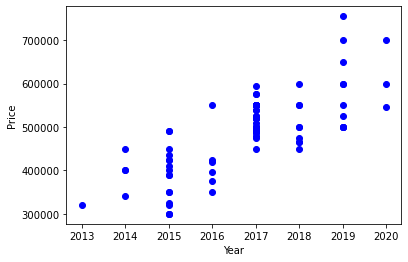

In [11]:
plt.scatter(x_train,y_train, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Fitting Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(x_test)

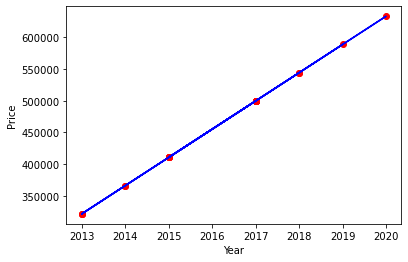

In [14]:
plt.scatter(x_test,y_pred, color = 'red')
plt.plot(x_test,y_pred, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Calculating the accuracy of Linear Regression model

In [15]:
from sklearn.metrics import  r2_score

In [16]:
print("r2 score calculated is : {}".format(r2_score(y_test,y_pred)))

r2 score calculated is : 0.6815514578193005


# Predicting price in 2022 using Linear Regression model

In [17]:
price_2022_lr=lr.predict([[2022]])
print("Price of second-hand Hyundai grand i10 car in 2022 is ",price_2022_lr)

Price of second-hand Hyundai grand i10 car in 2022 is  [[722224.24969575]]


# Fitting Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
ls=Lasso(normalize=True, tol=1e-2)

In [19]:
ls.fit(x_train,y_train)

Lasso(normalize=True, tol=0.01)

In [20]:
y_pred=ls.predict(x_test)

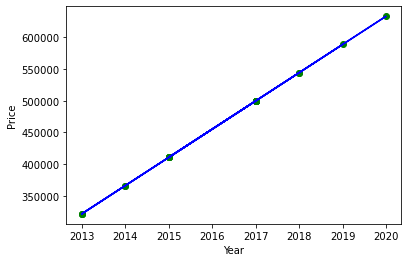

In [21]:
plt.scatter(x_test,y_pred, color = 'green')
plt.plot(x_test,y_pred, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Calculating accuracy of Lasso Regression model

In [22]:
print("r2 score calculated is : {}".format(r2_score(y_test,y_pred)))

r2 score calculated is : 0.6815715604941972


# Predicting price in 2022 using Lasso Regression

In [23]:
price_2022_ls=ls.predict([[2022]])
print("Price of second-hand Hyundai grand i10 car in 2022 is ",price_2022_ls)

Price of second-hand Hyundai grand i10 car in 2022 is  [722191.90368418]


# Linear Regression is the better model here

# 